In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

In [3]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5273,0.288301,-0.005703,-0.104693,-0.975772,-0.890654,-0.782806,-0.982131,-0.909935,-0.766902,-0.904673,...,-0.287720,-0.136962,-0.021551,0.207889,-0.518597,-0.833932,0.195287,-0.045917,25,STANDING
6728,0.332238,-0.041061,-0.098210,-0.196187,0.046864,-0.158142,-0.196331,-0.028672,-0.157875,-0.228066,...,-0.606514,-0.531550,0.408481,0.204352,-0.340118,-0.850137,0.167754,-0.062541,29,WALKING
2248,0.274461,-0.016868,-0.117919,-0.993703,-0.966266,-0.973124,-0.994279,-0.966903,-0.973060,-0.937156,...,-0.929257,-0.075866,0.074895,0.736928,-0.246118,-0.607224,0.233638,0.259972,14,STANDING
4286,0.247324,-0.020291,-0.097710,-0.981990,-0.992972,-0.986189,-0.982024,-0.992360,-0.984115,-0.939341,...,-0.699026,-0.042192,0.247257,-0.480280,0.367762,0.407305,-0.365204,-0.622721,21,LAYING
7093,0.248950,-0.017052,-0.065224,-0.393014,-0.167416,-0.138050,-0.442736,-0.170758,-0.151450,-0.219108,...,-0.061985,0.273612,-0.505894,-0.712965,-0.557902,-0.853741,0.197415,0.037992,30,WALKING
3954,0.433434,-0.020786,-0.230272,0.638776,0.633313,0.470354,0.640560,0.674962,0.291976,0.757892,...,-0.589773,-0.614617,0.654223,0.931024,0.378686,-0.624776,0.239592,0.241346,19,WALKING_DOWNSTAIRS
522,0.240755,-0.015526,-0.081665,-0.934992,-0.860022,-0.432988,-0.947475,-0.868873,-0.389555,-0.892006,...,-0.202149,0.460504,-0.092544,0.466167,-0.362469,-0.765039,0.260516,0.017851,3,STANDING
1101,0.333925,-0.024604,-0.117716,-0.262137,0.138769,-0.581897,-0.329035,0.157433,-0.581428,0.059184,...,-0.631388,-0.804562,0.908157,-0.464254,0.666057,-0.829948,0.215111,0.005539,6,WALKING
1654,0.262657,0.003349,-0.136568,-0.985522,-0.933997,-0.902629,-0.986475,-0.926840,-0.898233,-0.930340,...,-0.838772,0.094693,-0.056571,0.605646,-0.574111,-0.664631,-0.086914,-0.129244,8,SITTING
2802,0.312485,-0.035493,-0.073317,-0.193736,0.310060,-0.546220,-0.279317,0.270843,-0.515979,0.116829,...,-0.810003,-0.382280,0.485032,0.664387,-0.955229,-0.794245,0.236496,-0.016143,15,WALKING


Check for missing values in the dataset

In [4]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any())

Any missing sample in training set: False
Any missing sample in test set: False


Frequency Distribution of the Outome

In [5]:
train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


Visualizing Outcome Distribution

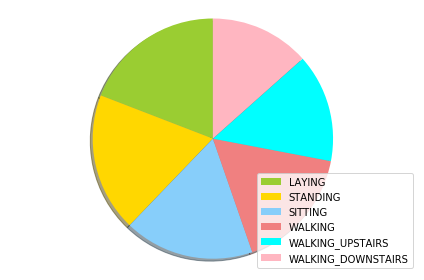

In [6]:
# Visualizing Outcome Distribution 
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Normalize the Predictor(Feature Set) for SVM training

In [7]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


Hyperparameter tuning using grid search and cross validation

In [8]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Training SVM model using radial kernel

In [9]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5,verbose=1)
svm_model.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Confusion Matrix and Accuracy Score

In [10]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9877584330794341 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [11]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  11 521   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.98      0.89      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958941


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)>